***	AIM : Design the architecture and implement the autoencoder model for Image denoising.***


PAREENITA A.SHIRSATH B.E.A.I.&.D.S.   ROLL.NO:57


DL EXPERIMENT NO : 07

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 133s 279ms/step - loss: 0.2438 - val_loss: 0.1195
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 279ms/step - loss: 0.1161 - val_loss: 0.1091
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 282ms/step - loss: 0.1092 - val_loss: 0.1057
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 287ms/step - loss: 0.1060 - val_loss: 0.1034
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 284ms/step - loss: 0.1037 - val_loss: 0.1015
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 133s 283ms/step - loss: 0.1019 - val_loss: 0.1010
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 287ms/step - loss: 0.1008 - val_loss: 0.0994
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 309ms/step - loss: 0.0999 - val_loss: 0.0986
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 188s 280ms/step - loss: 0.0991 - val_loss: 0.0987
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 134s 286ms/step - loss: 0.0985 - val_loss: 0.0974
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


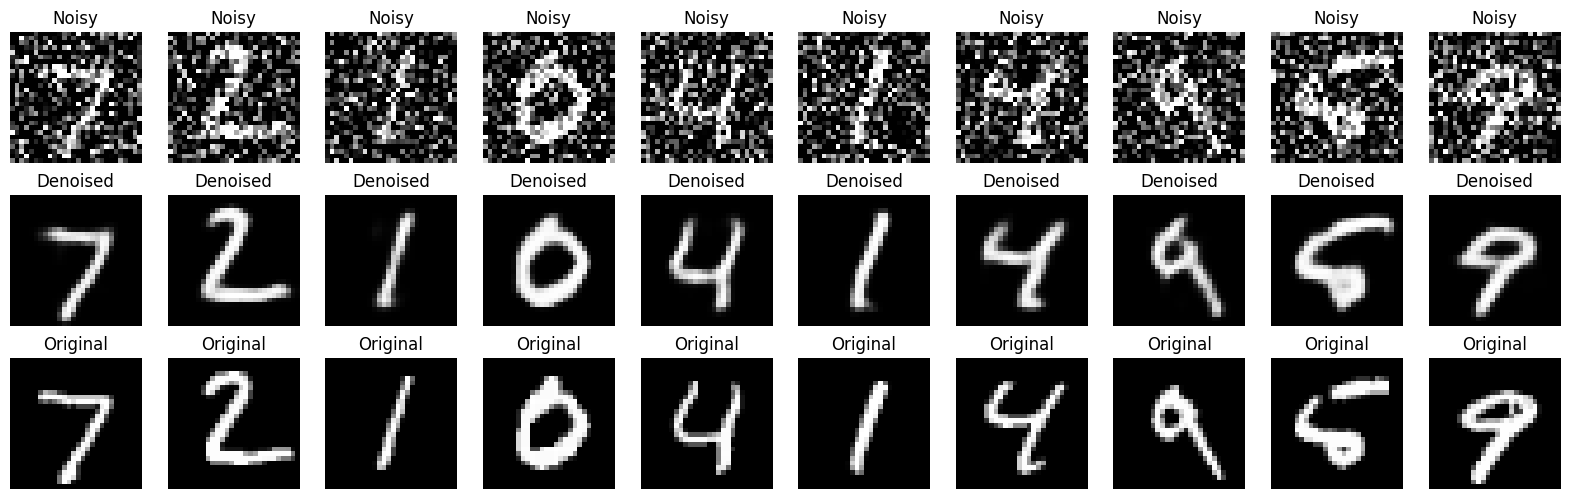

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.datasets import mnist

# 1. Load dataset (MNIST for demo)
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and reshape
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# 2. Add random noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 3. Build Autoencoder
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 4. Train model
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# 5. Predict on test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# 6. Plot Results
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

    # Ground Truth
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

plt.show()
